# Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Data

In [11]:
data = pd.read_csv('churn_data.csv')

In [12]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
user                       27000 non-null int64
churn                      27000 non-null int64
age                        26996 non-null float64
housing                    27000 non-null object
credit_score               18969 non-null float64
deposits                   27000 non-null int64
withdrawal                 27000 non-null int64
purchases_partners         27000 non-null int64
purchases                  27000 non-null int64
cc_taken                   27000 non-null int64
cc_recommended             27000 non-null int64
cc_disliked                27000 non-null int64
cc_liked                   27000 non-null int64
cc_application_begin       27000 non-null int64
app_downloaded             27000 non-null int64
web_user                   27000 non-null int64
app_web_user               27000 non-null int64
ios_user                   27000 non-null int64
android_user          

# Data Cleaning

In [14]:
#Filling the data which are null with their mean


data['age'].fillna(data['age'].mean(),inplace=True)
data['credit_score'].fillna(data['credit_score'].mean(),inplace=True)
data['rewards_earned'].fillna(data['rewards_earned'].mean(),inplace=True)

In [15]:
#Dropping the Zodiac Sign column because a customer is less likely to churn based on his zodiac sign.
#Separating the dependent variable ( output ) from the independent variables ( features )


y = data['churn']
X = data.drop(['user','churn','zodiac_sign'],axis=1)

In [16]:
X.head()

,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,37.0,na,542.944225,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,1,0,29.110125,0.00,0
1,28.0,R,486.000000,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,0,0,44.000000,1.47,1
2,35.0,R,561.000000,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,1,0,65.000000,2.17,0
3,26.0,R,567.000000,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,0,0,33.000000,1.10,1
4,27.0,na,542.944225,0,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,1,0,1.000000,0.03,0


# Data Visualization

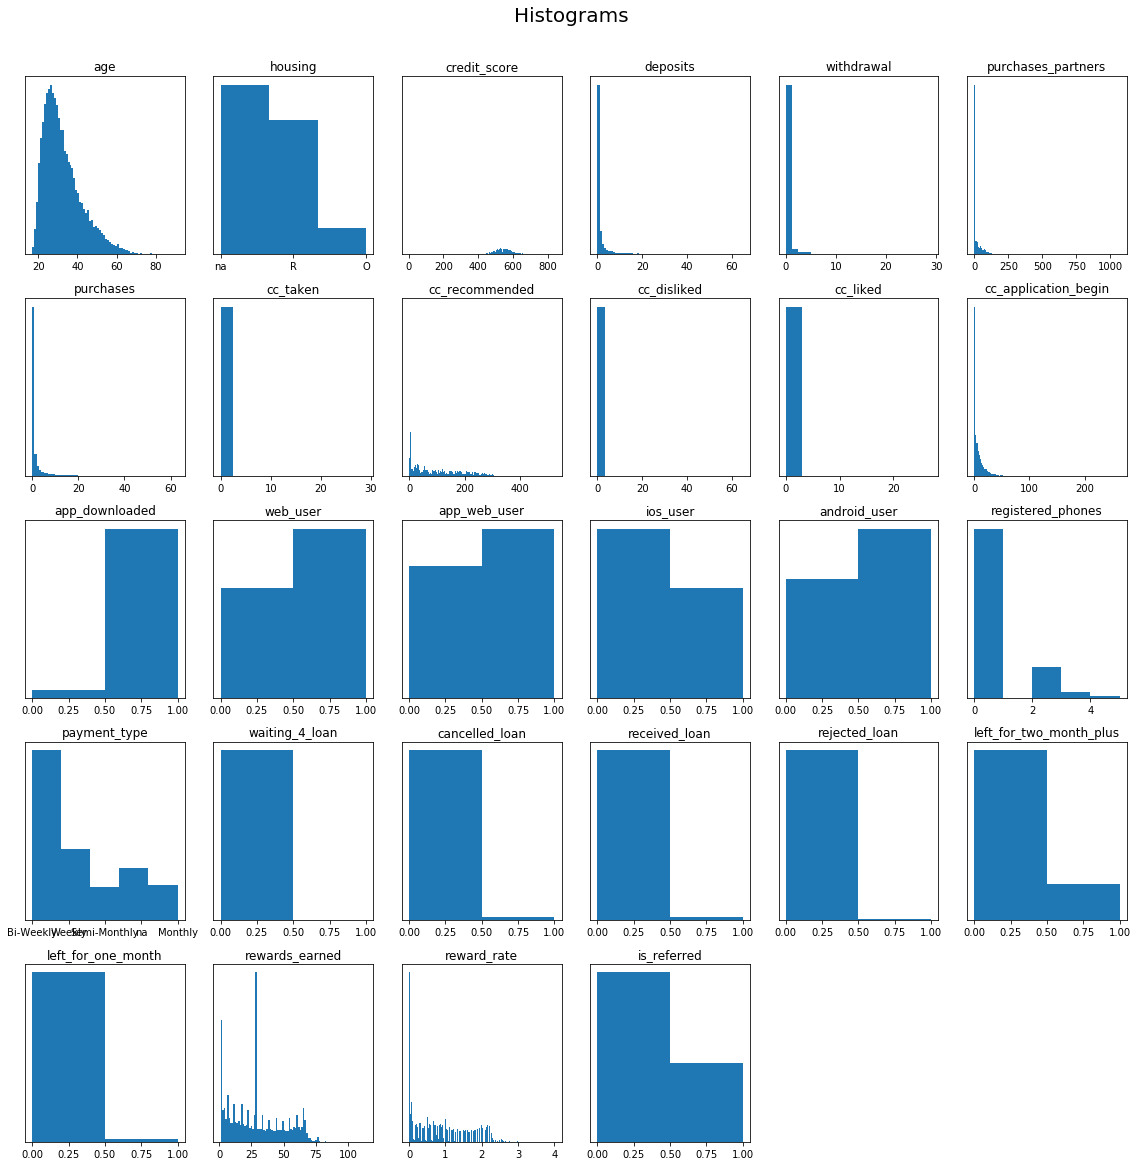

In [18]:
#Plotting the histograms of all the features

fig = plt.figure(figsize=[16,20])
plt.suptitle('Histograms',fontsize=20)
for i in range(1,X.shape[1]+1):
    plt.subplot(6,6,i)
    f = plt.gca()                #to get current axes of current subplot for x and y axes names and title
    f.axes.get_yaxis().set_visible(False)
    f.set_title(X.columns[i-1])
    vals = np.size(X.iloc[:,i-1].unique())
    plt.hist(X.iloc[:,i-1],bins=vals)
plt.tight_layout(rect=[0,0.03,1,0.95])
    

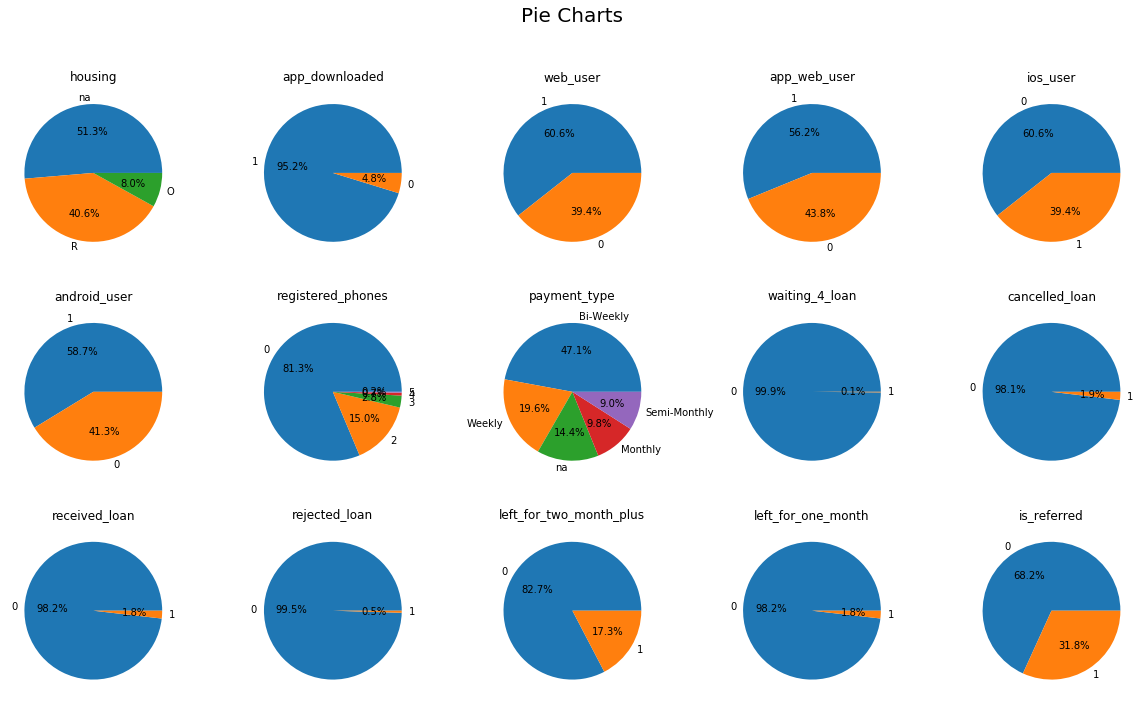

In [20]:
#Pie Charts For Binary/Categorical Columns ( Because we couldn't study much about these from the histograms)

BinaryColumns = X[['housing','app_downloaded','web_user', 'app_web_user', 'ios_user', 
                   'android_user','registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan','received_loan',
                   'rejected_loan', 'left_for_two_month_plus','left_for_one_month','is_referred']]
fig = plt.figure(figsize=[16,20])
plt.suptitle('Pie Charts',fontsize=20)
for i in range(1,BinaryColumns.shape[1]+1):
    plt.subplot(6,5,i)
    f = plt.gca()                                           #to get current axes of current subplot for x and y axes names
    f.axes.get_yaxis().set_visible(False)
    f.set_title(BinaryColumns.columns[i-1])
    values = BinaryColumns.iloc[:,i-1].value_counts(normalize =True).values           #normalize=True to get in percentage
    index = BinaryColumns.iloc[:,i-1].value_counts(normalize =True).index
    plt.pie(values,labels=index,autopct='%1.1f%%')                                        #autopct to show the percentages
plt.tight_layout(rect=[0,0.03,1,0.95])

In [12]:
#As we see from the pie chart that there are some columns for which there are subsets which are very very small. 
#For e.g cancelled_loan , received_loan,etc. 
#We don't want these subsets to be so small that it cannot include churn variable both 0 and 1.

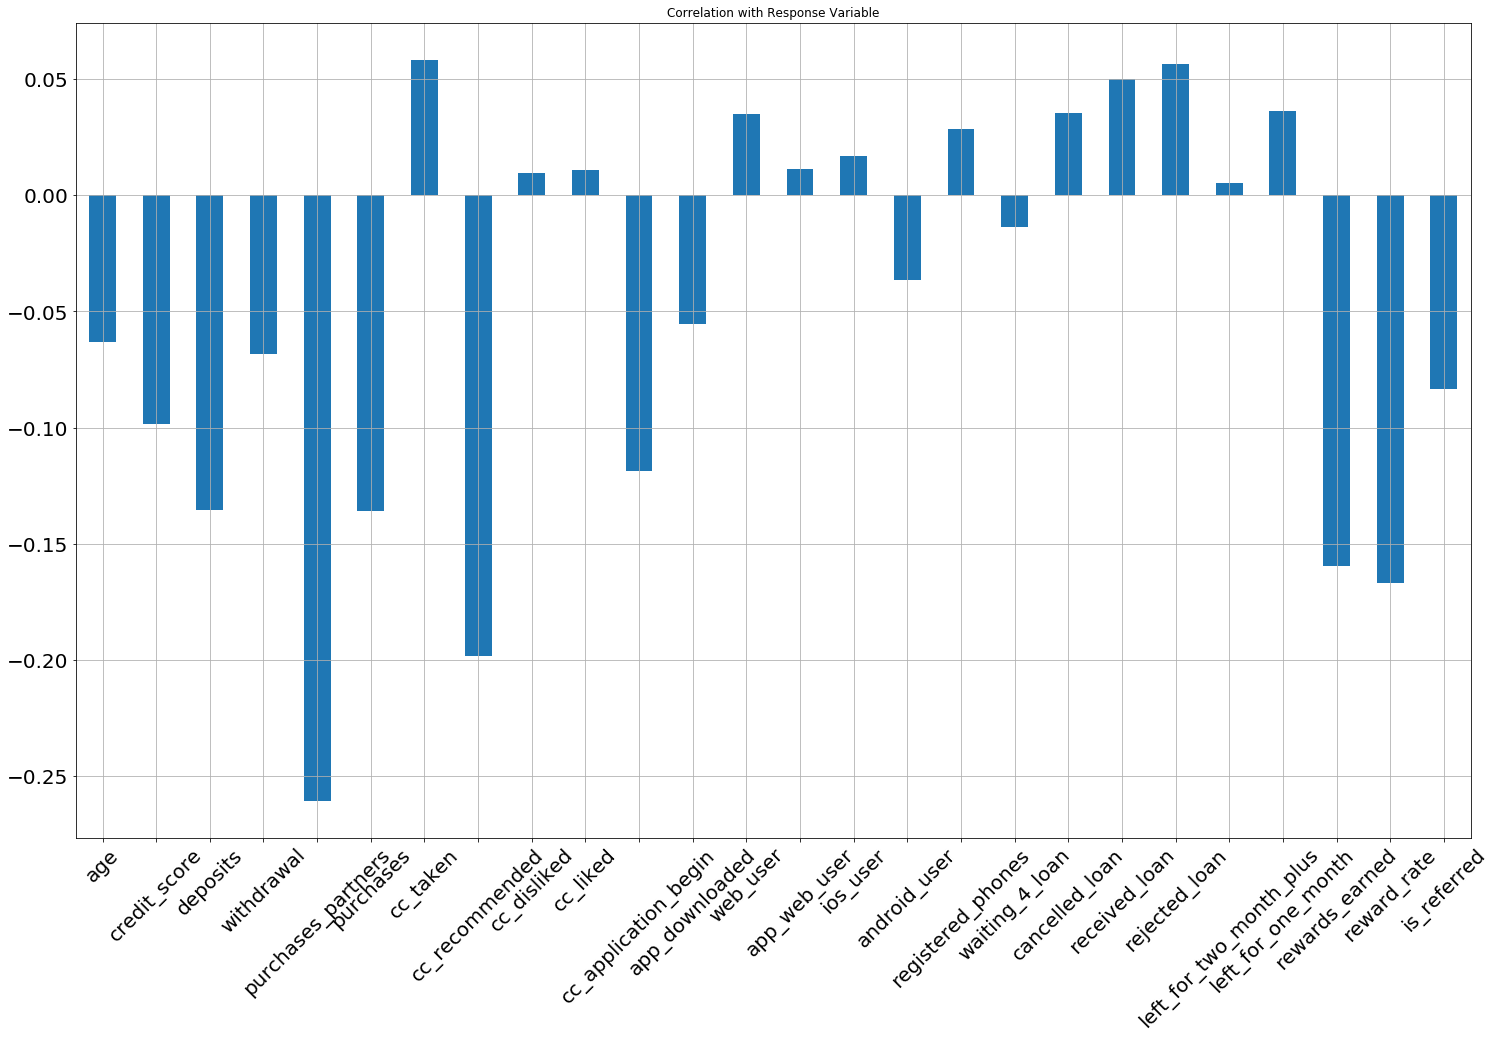

In [23]:
#Correlation Plot with the Output Variable (to see Which fields will impact the output the most)
 
#correlation plot work on only numerical columns, so we are removing the categorical and string columns


X.drop(['housing','payment_type'],axis=1).corrwith(y).plot.bar(figsize=(25,15),title='Correlation with Response Variable',fontsize = 20,rot=45,grid=True)

#corrwith function will create the correlation of all columns with the argument of this function.
#rot argument rotates the X labels a bit for readability.

In [14]:
#Some observations from the correlations shown above:

#There are many features which go below the zero line. That means they are negatively correlated. 
#For example for cc_taken , the bigger it is , more likely that that customer will churn.
#For age, the smaller it is , more likely that the customer will churn.
#If you have not began application (cc_application_begin) , you are more likely to churn.
#That is, if you have began application (cc_application_begin), you are more likely to stay. 
#If you have downloaded the app , you are more likely to stay.

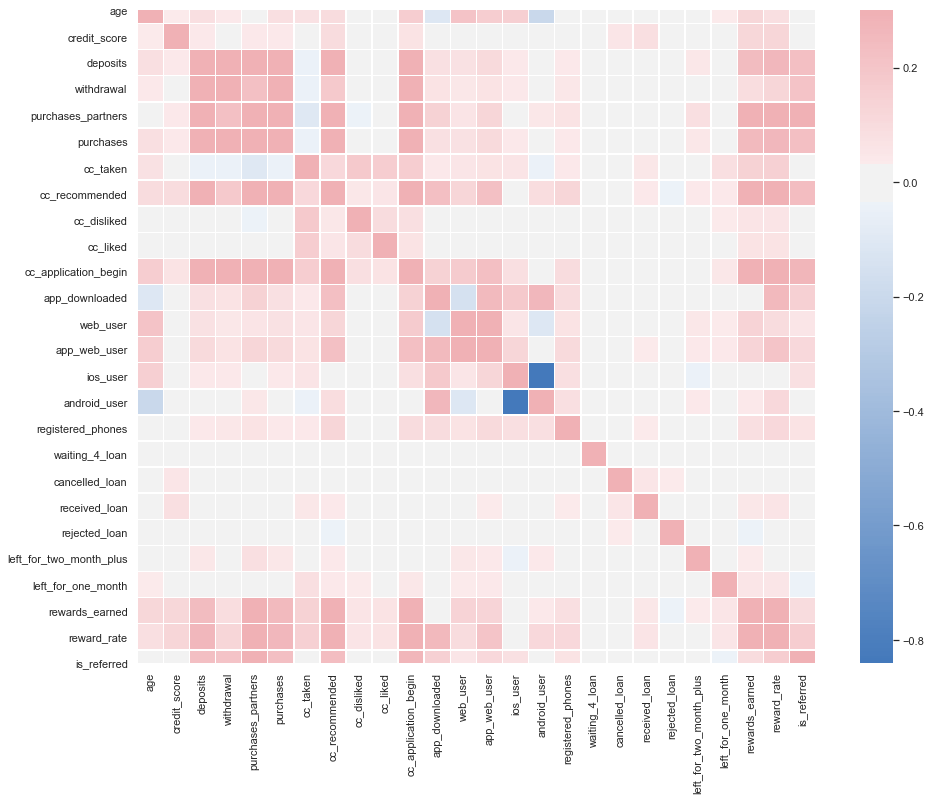

In [30]:
#Correlation Matrix

fig = plt.figure(figsize=[16,12])
corr = X.corr()
cmap = sns.diverging_palette(250,10,as_cmap=True)
sns.heatmap(corr,cmap = cmap,square=True,center=0,linewidths=0.5,vmax=0.3)

In [31]:
#Some observations from the correlations shown above:


#Strongest positive correlation goes just till 0.2.So in the positive side, there is not much strong correlation.
#Strongest negative correlation goes till -0.8
#Strongest negative correlation is between ios_user and android_user which is quite obvious.
#If you are an android_user, it is less likely that you will be an ios_user.
#But the correlation is not -1 because it is not completely correlated.
#There might be customers with both ios and android devices.
#Since these two have high correlation, it will be better if we remove one of them.

X.drop(['ios_user'],axis=1,inplace=True)

In [32]:
#Correlation matrix doesn't show all the correlations.
#For e.g.,app_web_user(uses both app and web app) can only be one if web_user and app_downloaded are one. 
#So it is dependent on these two.
#Since it is not an independent variable, we will discard it.

X.drop(['app_web_user'],axis=1,inplace=True)


# Data Preprocessing

In [33]:
#we will convert the categorical columns to different categories.
#If we just use labels for categorical data, ML model thinks that the higher the label,the more important it is.
#But this is not the case.There is no relation between the labels.
#So we are separating them out in n columns where n is the number of categories.
#We will do this using dummy variables from pandas.
#To avoid dummy variable trap, we drop the first column after getting the dummy variables.
#Dummy Variable Trap - When we have 3 categories in a column, dummy variables will give 3 columns.
#Everytime time when one of the column has 1 , the rest two has to be 0.That is highly correlated data. We dont want that.


X = pd.get_dummies(data=X) 
X.drop(['housing_na','payment_type_na'],axis=1,inplace=True)

In [34]:
X.head()

,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,left_for_one_month,rewards_earned,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly
0,37.0,542.944225,0,0,0,0,0,0,0,0,...,0,29.110125,0.00,0,0,0,1,0,0,0
1,28.0,486.000000,0,0,1,0,0,96,0,0,...,0,44.000000,1.47,1,0,1,0,0,0,1
2,35.0,561.000000,47,2,86,47,0,285,0,0,...,0,65.000000,2.17,0,0,1,0,0,1,0
3,26.0,567.000000,26,3,38,25,0,74,0,0,...,0,33.000000,1.10,1,0,1,1,0,0,0
4,27.0,542.944225,0,0,2,0,0,0,0,0,...,0,1.000000,0.03,0,0,0,1,0,0,0


In [35]:
#Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
#Balancing the training data - to remove decieving accuracy in case of bias.
#If we have a biased model giving 0 as output always, and if we have a dataset having 60 percent output 0 case,then the accuracy is 60 percent but it is decieving.



pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index
    
np.random.seed(0)  

#Choose from higher index list, n indices where n is equal to size of lower index list.
#So that we have same number of both positive and negative indices.

higher = np.random.choice(higher, size=len(lower)) 

#Since higher became an array,we are converting lower into an array too.
lower = np.asarray(lower)

finalIndexList = np.concatenate((higher,lower))
X_train = X_train.loc[finalIndexList,:]
y_train = y_train.loc[finalIndexList]

In [37]:
#Feature scaling 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(data=sc.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=sc.fit_transform(X_test),columns=X_test.columns,index=X_test.index)


# Model Training

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [41]:
#Making a neural network classifier

In [42]:
ann_model = Sequential()
ann_model.add(Dense(units=16,activation='relu',kernel_initializer='uniform',input_shape=(30,)))
ann_model.add(Dense(units=8,activation='relu',kernel_initializer='uniform',input_shape=(16,)))
ann_model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform',input_shape=(8,1)))
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
ann_model.fit(x=X_train,y=y_train,batch_size=100,epochs=50)




Epoch 1/50





16770/16770 [==============================] - 3s 197us/step - loss: 0.6717 - acc: 0.5934
Epoch 2/50
16770/16770 [==============================] - 0s 26us/step - loss: 0.6321 - acc: 0.6404
Epoch 3/50
16770/16770 [==============================] - 0s 26us/step - loss: 0.6231 - acc: 0.6516
Epoch 4/50
16770/16770 [==============================] - 0s 26us/step - loss: 0.6178 - acc: 0.6593
Epoch 5/50
16770/16770 [==============================] - 0s 26us/step - loss: 0.6136 - acc: 0.6619
Epoch 6/50
16770/16770 [==============================] - 0s 26us/step - loss: 0.6097 - acc: 0.6676
Epoch 7/50
16770/16770 [==============================] - 0s 25us/step - loss: 0.6074 - acc: 0.6667
Epoch 8/50
16770/16770 [==============================] - 0s 26us/step - loss: 0.6041 - acc: 0.6704
Epoch 9/50
16770/16770 [==============================] - 0s 27us/step - loss: 0.6013 - acc: 0.6741
Epoch 10/50
16770/16770 [==============================] - 0s 26us/step - loss: 0.5988 - ac

In [48]:
y_pred = ann_model.predict(X_test)
y_pred = y_pred > 0.5

from sklearn.metrics import confusion_matrix,f1_score

print("Confusion Matrix :")
print(confusion_matrix(y_test,y_pred))
print("F1 Score : {}".format(f1_score(y_test,y_pred)))       #Function of Precision and Recall and balances them out.

Confusion Matrix :
[[2631 1330]
 [ 803 1986]]
F1 Score : 0.6506142506142505


In [50]:
print("Accuracy : {}".format((2631+1986)/(2631+1330+803+1986)))    #Accuracy calculated from confusion matrix

Accuracy : 0.684


In [68]:
#If we run the previous code n imes, we may end up getting n different accuracies.
#So one accuracy may not be the original accuracy of the model.
#Hence we will take the mean accuracy after applying K-Fold Cross Validation


from keras.wrappers.scikit_learn import KerasClassifier #To wrap the K-fold function written in scikit learn to keras
from sklearn.model_selection import cross_val_score
def build_model():
    ann_model = Sequential()
    ann_model.add(Dense(units=16,activation='relu',kernel_initializer='uniform',input_shape=(30,)))
    ann_model.add(Dense(units=8,activation='relu',kernel_initializer='uniform',input_shape=(16,)))
    ann_model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform',input_shape=(8,1)))
    ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return ann_model
classifier = KerasClassifier(build_fn=build_model,batch_size=100,epochs=50)
accuracies = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)

Epoch 1/50
15093/15093 [==============================] - 10s 687us/step - loss: 0.6710 - acc: 0.6085
Epoch 2/50
15093/15093 [==============================] - 1s 59us/step - loss: 0.6301 - acc: 0.6489
Epoch 3/50
15093/15093 [==============================] - 1s 58us/step - loss: 0.6214 - acc: 0.6606
Epoch 4/50
15093/15093 [==============================] - 1s 60us/step - loss: 0.6169 - acc: 0.6628
Epoch 5/50
15093/15093 [==============================] - 1s 76us/step - loss: 0.6127 - acc: 0.6663
Epoch 6/50
15093/15093 [==============================] - 1s 78us/step - loss: 0.6085 - acc: 0.6682
Epoch 7/50
15093/15093 [==============================] - 1s 70us/step - loss: 0.6043 - acc: 0.6726
Epoch 8/50
15093/15093 [==============================] - 1s 60us/step - loss: 0.6006 - acc: 0.6744
Epoch 9/50
15093/15093 [==============================] - 1s 60us/step - loss: 0.5973 - acc: 0.6775
Epoch 10/50
15093/15093 [==============================] - 1s 58us/step - loss: 0.5948 - acc: 0.67

15093/15093 [==============================] - 1s 41us/step - loss: 0.5738 - acc: 0.7065
Epoch 32/50
15093/15093 [==============================] - 1s 41us/step - loss: 0.5734 - acc: 0.7064
Epoch 33/50
15093/15093 [==============================] - 1s 40us/step - loss: 0.5732 - acc: 0.7049
Epoch 34/50
15093/15093 [==============================] - 1s 40us/step - loss: 0.5720 - acc: 0.7042
Epoch 35/50
15093/15093 [==============================] - 1s 40us/step - loss: 0.5713 - acc: 0.7066
Epoch 36/50
15093/15093 [==============================] - 1s 40us/step - loss: 0.5716 - acc: 0.7077
Epoch 37/50
15093/15093 [==============================] - 1s 40us/step - loss: 0.5706 - acc: 0.7059
Epoch 38/50
15093/15093 [==============================] - 1s 40us/step - loss: 0.5702 - acc: 0.7092
Epoch 39/50
15093/15093 [==============================] - 1s 40us/step - loss: 0.5705 - acc: 0.7057
Epoch 40/50
15093/15093 [==============================] - 1s 40us/step - loss: 0.5698 - acc: 0.7077
Ep

15093/15093 [==============================] - 1s 63us/step - loss: 0.5926 - acc: 0.6835
Epoch 11/50
15093/15093 [==============================] - 1s 71us/step - loss: 0.5908 - acc: 0.6850
Epoch 12/50
15093/15093 [==============================] - 1s 98us/step - loss: 0.5893 - acc: 0.6861
Epoch 13/50
15093/15093 [==============================] - 1s 80us/step - loss: 0.5874 - acc: 0.6886
Epoch 14/50
15093/15093 [==============================] - 1s 63us/step - loss: 0.5863 - acc: 0.6883
Epoch 15/50
15093/15093 [==============================] - 1s 92us/step - loss: 0.5847 - acc: 0.6900: 0s - loss: 0.575
Epoch 16/50
15093/15093 [==============================] - 1s 80us/step - loss: 0.5834 - acc: 0.6908
Epoch 17/50
15093/15093 [==============================] - 1s 70us/step - loss: 0.5827 - acc: 0.6943
Epoch 18/50
15093/15093 [==============================] - 1s 66us/step - loss: 0.5816 - acc: 0.6938
Epoch 19/50
15093/15093 [==============================] - 1s 68us/step - loss: 0.580

15093/15093 [==============================] - 1s 67us/step - loss: 0.5672 - acc: 0.7063
Epoch 40/50
15093/15093 [==============================] - 1s 69us/step - loss: 0.5672 - acc: 0.7032
Epoch 41/50
15093/15093 [==============================] - 1s 64us/step - loss: 0.5664 - acc: 0.7063
Epoch 42/50
15093/15093 [==============================] - 1s 67us/step - loss: 0.5661 - acc: 0.7081
Epoch 43/50
15093/15093 [==============================] - 1s 72us/step - loss: 0.5652 - acc: 0.7076
Epoch 44/50
15093/15093 [==============================] - 1s 74us/step - loss: 0.5644 - acc: 0.7097
Epoch 45/50
15093/15093 [==============================] - 1s 82us/step - loss: 0.5637 - acc: 0.7097
Epoch 46/50
15093/15093 [==============================] - 1s 67us/step - loss: 0.5639 - acc: 0.7085
Epoch 47/50
15093/15093 [==============================] - 1s 55us/step - loss: 0.5638 - acc: 0.7077
Epoch 48/50
15093/15093 [==============================] - 1s 46us/step - loss: 0.5634 - acc: 0.7109
Ep

15093/15093 [==============================] - 1s 38us/step - loss: 0.5863 - acc: 0.6918
Epoch 20/50
15093/15093 [==============================] - 1s 38us/step - loss: 0.5850 - acc: 0.6942
Epoch 21/50
15093/15093 [==============================] - 1s 38us/step - loss: 0.5837 - acc: 0.6926
Epoch 22/50
15093/15093 [==============================] - 1s 37us/step - loss: 0.5829 - acc: 0.6926
Epoch 23/50
15093/15093 [==============================] - 1s 37us/step - loss: 0.5826 - acc: 0.6940
Epoch 24/50
15093/15093 [==============================] - 1s 38us/step - loss: 0.5816 - acc: 0.6923
Epoch 25/50
15093/15093 [==============================] - 1s 37us/step - loss: 0.5810 - acc: 0.6946
Epoch 26/50
15093/15093 [==============================] - 1s 38us/step - loss: 0.5808 - acc: 0.6952
Epoch 27/50
15093/15093 [==============================] - 1s 38us/step - loss: 0.5798 - acc: 0.6928
Epoch 28/50
15093/15093 [==============================] - 1s 38us/step - loss: 0.5796 - acc: 0.6938
Ep

15093/15093 [==============================] - 1s 38us/step - loss: 0.5622 - acc: 0.7055
Epoch 50/50
1677/1677 [==============================] - 2s 1ms/step
Epoch 1/50
15093/15093 [==============================] - 6s 414us/step - loss: 0.6706 - acc: 0.5741
Epoch 2/50
15093/15093 [==============================] - 1s 39us/step - loss: 0.6290 - acc: 0.6479
Epoch 3/50
15093/15093 [==============================] - 1s 39us/step - loss: 0.6175 - acc: 0.6606
Epoch 4/50
15093/15093 [==============================] - 1s 39us/step - loss: 0.6119 - acc: 0.6677
Epoch 5/50
15093/15093 [==============================] - 1s 37us/step - loss: 0.6067 - acc: 0.6733
Epoch 6/50
15093/15093 [==============================] - 1s 39us/step - loss: 0.6021 - acc: 0.6764
Epoch 7/50
15093/15093 [==============================] - 1s 38us/step - loss: 0.5983 - acc: 0.6820
Epoch 8/50
15093/15093 [==============================] - 1s 39us/step - loss: 0.5954 - acc: 0.6813
Epoch 9/50
15093/15093 [=================

15093/15093 [==============================] - 1s 41us/step - loss: 0.5666 - acc: 0.7052
Epoch 30/50
15093/15093 [==============================] - 1s 41us/step - loss: 0.5660 - acc: 0.7060
Epoch 31/50
15093/15093 [==============================] - 1s 39us/step - loss: 0.5654 - acc: 0.7050
Epoch 32/50
15093/15093 [==============================] - 1s 42us/step - loss: 0.5652 - acc: 0.7068
Epoch 33/50
15093/15093 [==============================] - 1s 44us/step - loss: 0.5642 - acc: 0.7081
Epoch 34/50
15093/15093 [==============================] - 1s 43us/step - loss: 0.5633 - acc: 0.7058
Epoch 35/50
15093/15093 [==============================] - 1s 40us/step - loss: 0.5630 - acc: 0.7081
Epoch 36/50
15093/15093 [==============================] - 1s 39us/step - loss: 0.5621 - acc: 0.7071
Epoch 37/50
15093/15093 [==============================] - 1s 40us/step - loss: 0.5629 - acc: 0.7103
Epoch 38/50
15093/15093 [==============================] - 1s 39us/step - loss: 0.5611 - acc: 0.7100
Ep

In [69]:
#Calculating and printing out the results of using K-fold classification

mean = accuracies.mean()
variance = accuracies.std()
print("Accuracies : {}".format(accuracies))
print("Mean : {} , Variance : {}".format(mean,variance))

Accuracies : [0.6541443  0.59570662 0.54919499 0.58199165 0.65831842 0.56112104
 0.59809183 0.53309481 0.5921288  0.61538462]
Mean : 0.5939177091198444 , Variance : 0.038957342612025485


# Improving The Model

In [64]:
#Applying Parameter tuning to get the best values of the fixed parameters(Checking Batch Size,Epochs and Optimizer)
#This will improve the accuracy of the model

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def build_model(optimizer):
    ann_model = Sequential()
    ann_model.add(Dense(units=16,activation='relu',kernel_initializer='uniform',input_shape=(30,)))
    ann_model.add(Dense(units=8,activation='relu',kernel_initializer='uniform',input_shape=(16,)))
    ann_model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform',input_shape=(8,1)))
    ann_model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return ann_model
classifier = KerasClassifier(build_fn=build_model)
param_list = {'batch_size':[50,150],'epochs':[30,80],'optimizer':['adam','rmsprop']}
gridSearch = GridSearchCV(estimator=classifier,param_grid=param_list,scoring='accuracy',cv=10)
grid = gridSearch.fit(X_train,y_train)

Epoch 1/30
15093/15093 [==============================] - 3s 199us/step - loss: 0.6552 - acc: 0.6251
Epoch 2/30
15093/15093 [==============================] - 1s 58us/step - loss: 0.6213 - acc: 0.6612
Epoch 3/30
15093/15093 [==============================] - 1s 59us/step - loss: 0.6144 - acc: 0.6633
Epoch 4/30
15093/15093 [==============================] - 1s 60us/step - loss: 0.6083 - acc: 0.6692
Epoch 5/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.6024 - acc: 0.6746
Epoch 6/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5983 - acc: 0.6752
Epoch 7/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5949 - acc: 0.6805
Epoch 8/30
15093/15093 [==============================] - 1s 59us/step - loss: 0.5920 - acc: 0.6830
Epoch 9/30
15093/15093 [==============================] - 1s 57us/step - loss: 0.5903 - acc: 0.6843
Epoch 10/30
15093/15093 [==============================] - 1s 58us/step - loss: 0.5889 - acc: 0.683

15093/15093 [==============================] - 1s 61us/step - loss: 0.5722 - acc: 0.7000
Epoch 23/30
15093/15093 [==============================] - 1s 65us/step - loss: 0.5713 - acc: 0.7003
Epoch 24/30
15093/15093 [==============================] - 1s 67us/step - loss: 0.5707 - acc: 0.7010
Epoch 25/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5701 - acc: 0.7012
Epoch 26/30
15093/15093 [==============================] - 1s 60us/step - loss: 0.5686 - acc: 0.7014
Epoch 27/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5685 - acc: 0.7006
Epoch 28/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5675 - acc: 0.7030
Epoch 29/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5665 - acc: 0.7025
Epoch 30/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5662 - acc: 0.7044
Epoch 1/30
15093/15093 [==============================] - 3s 220us/step - loss: 0.6553 - acc: 0.6220
Ep

15093/15093 [==============================] - 1s 64us/step - loss: 0.5858 - acc: 0.6895
Epoch 14/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5851 - acc: 0.6895
Epoch 15/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5836 - acc: 0.6877
Epoch 16/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5828 - acc: 0.6915
Epoch 17/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5820 - acc: 0.6921
Epoch 18/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5808 - acc: 0.6907
Epoch 19/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5791 - acc: 0.6932
Epoch 20/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5787 - acc: 0.6947
Epoch 21/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5776 - acc: 0.6942
Epoch 22/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5765 - acc: 0.6965
Ep

15093/15093 [==============================] - 1s 62us/step - loss: 0.6046 - acc: 0.6708
Epoch 5/30
15093/15093 [==============================] - 1s 63us/step - loss: 0.5993 - acc: 0.6751
Epoch 6/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5959 - acc: 0.6774
Epoch 7/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5941 - acc: 0.6801
Epoch 8/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5912 - acc: 0.6825
Epoch 9/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5892 - acc: 0.6820
Epoch 10/30
15093/15093 [==============================] - 1s 63us/step - loss: 0.5877 - acc: 0.6841
Epoch 11/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5860 - acc: 0.6848
Epoch 12/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5845 - acc: 0.6890
Epoch 13/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5835 - acc: 0.6867
Epoch 1

15093/15093 [==============================] - 1s 61us/step - loss: 0.5784 - acc: 0.6946
Epoch 26/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.5779 - acc: 0.6964
Epoch 27/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5774 - acc: 0.6958
Epoch 28/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5767 - acc: 0.6971
Epoch 29/30
15093/15093 [==============================] - 1s 59us/step - loss: 0.5758 - acc: 0.6985
Epoch 30/30
15093/15093 [==============================] - 1s 66us/step - loss: 0.5751 - acc: 0.7001
Epoch 1/30
15093/15093 [==============================] - 4s 249us/step - loss: 0.6623 - acc: 0.6246
Epoch 2/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.6268 - acc: 0.6533
Epoch 3/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.6192 - acc: 0.6613
Epoch 4/30
15093/15093 [==============================] - 1s 61us/step - loss: 0.6147 - acc: 0.6661
Epoch

15093/15093 [==============================] - 1s 65us/step - loss: 0.5906 - acc: 0.6886
Epoch 17/30
15093/15093 [==============================] - 1s 63us/step - loss: 0.5887 - acc: 0.6929
Epoch 18/30
15093/15093 [==============================] - 1s 63us/step - loss: 0.5878 - acc: 0.6922
Epoch 19/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5860 - acc: 0.6954
Epoch 20/30
15093/15093 [==============================] - 1s 63us/step - loss: 0.5844 - acc: 0.6957
Epoch 21/30
15093/15093 [==============================] - 1s 64us/step - loss: 0.5833 - acc: 0.6994
Epoch 22/30
15093/15093 [==============================] - 1s 63us/step - loss: 0.5814 - acc: 0.6995
Epoch 23/30
15093/15093 [==============================] - 1s 63us/step - loss: 0.5795 - acc: 0.7002
Epoch 24/30
15093/15093 [==============================] - 1s 62us/step - loss: 0.5785 - acc: 0.6999
Epoch 25/30
15093/15093 [==============================] - 1s 64us/step - loss: 0.5775 - acc: 0.6984
Ep

15093/15093 [==============================] - 1s 65us/step - loss: 0.6037 - acc: 0.6772
Epoch 8/30
15093/15093 [==============================] - 1s 66us/step - loss: 0.6007 - acc: 0.6821
Epoch 9/30
15093/15093 [==============================] - 1s 69us/step - loss: 0.5983 - acc: 0.6827
Epoch 10/30
15093/15093 [==============================] - 1s 69us/step - loss: 0.5959 - acc: 0.6844
Epoch 11/30
15093/15093 [==============================] - 1s 71us/step - loss: 0.5941 - acc: 0.6868
Epoch 12/30
15093/15093 [==============================] - 1s 69us/step - loss: 0.5920 - acc: 0.6879: 0s - loss: 0.5
Epoch 13/30
15093/15093 [==============================] - 1s 69us/step - loss: 0.5904 - acc: 0.6879
Epoch 14/30
15093/15093 [==============================] - 1s 69us/step - loss: 0.5892 - acc: 0.6894
Epoch 15/30
15093/15093 [==============================] - 1s 69us/step - loss: 0.5876 - acc: 0.6918
Epoch 16/30
15093/15093 [==============================] - 1s 69us/step - loss: 0.5869 - 

15093/15093 [==============================] - 1s 68us/step - loss: 0.5710 - acc: 0.7008
Epoch 29/30
15093/15093 [==============================] - 1s 68us/step - loss: 0.5696 - acc: 0.6996
Epoch 30/30
15093/15093 [==============================] - 1s 69us/step - loss: 0.5685 - acc: 0.7008
Epoch 1/30
15093/15093 [==============================] - 5s 313us/step - loss: 0.6581 - acc: 0.6096
Epoch 2/30
15093/15093 [==============================] - 1s 70us/step - loss: 0.6257 - acc: 0.6513
Epoch 3/30
15093/15093 [==============================] - 1s 68us/step - loss: 0.6175 - acc: 0.6603
Epoch 4/30
15093/15093 [==============================] - 1s 68us/step - loss: 0.6116 - acc: 0.6679
Epoch 5/30
15093/15093 [==============================] - 1s 69us/step - loss: 0.6059 - acc: 0.6749
Epoch 6/30
15093/15093 [==============================] - 1s 76us/step - loss: 0.6018 - acc: 0.6790
Epoch 7/30
15093/15093 [==============================] - 1s 72us/step - loss: 0.5982 - acc: 0.6826
Epoch 8/

15093/15093 [==============================] - 1s 69us/step - loss: 0.5560 - acc: 0.7116
Epoch 50/80
15093/15093 [==============================] - 1s 69us/step - loss: 0.5559 - acc: 0.7140
Epoch 51/80
15093/15093 [==============================] - 1s 70us/step - loss: 0.5555 - acc: 0.7128
Epoch 52/80
15093/15093 [==============================] - 1s 69us/step - loss: 0.5547 - acc: 0.7138
Epoch 53/80
15093/15093 [==============================] - 1s 70us/step - loss: 0.5548 - acc: 0.7160
Epoch 54/80
15093/15093 [==============================] - 1s 72us/step - loss: 0.5545 - acc: 0.7152
Epoch 55/80
15093/15093 [==============================] - 1s 69us/step - loss: 0.5533 - acc: 0.7179
Epoch 56/80
15093/15093 [==============================] - 1s 69us/step - loss: 0.5539 - acc: 0.7156
Epoch 57/80
15093/15093 [==============================] - 1s 69us/step - loss: 0.5526 - acc: 0.7161
Epoch 58/80
15093/15093 [==============================] - 1s 70us/step - loss: 0.5531 - acc: 0.7176
Ep

15093/15093 [==============================] - 1s 71us/step - loss: 0.5619 - acc: 0.7083
Epoch 51/80
15093/15093 [==============================] - 1s 74us/step - loss: 0.5616 - acc: 0.7093
Epoch 52/80
15093/15093 [==============================] - 1s 73us/step - loss: 0.5611 - acc: 0.7087
Epoch 53/80
15093/15093 [==============================] - 1s 72us/step - loss: 0.5604 - acc: 0.7096
Epoch 54/80
15093/15093 [==============================] - 1s 73us/step - loss: 0.5600 - acc: 0.7124
Epoch 55/80
15093/15093 [==============================] - 1s 71us/step - loss: 0.5604 - acc: 0.7101
Epoch 56/80
15093/15093 [==============================] - 1s 71us/step - loss: 0.5600 - acc: 0.7101
Epoch 57/80
15093/15093 [==============================] - 1s 72us/step - loss: 0.5598 - acc: 0.7098
Epoch 58/80
15093/15093 [==============================] - 1s 71us/step - loss: 0.5596 - acc: 0.7130
Epoch 59/80
15093/15093 [==============================] - 1s 72us/step - loss: 0.5585 - acc: 0.7129
Ep

15093/15093 [==============================] - 1s 72us/step - loss: 0.5519 - acc: 0.7195
Epoch 52/80
15093/15093 [==============================] - 1s 69us/step - loss: 0.5513 - acc: 0.7217
Epoch 53/80
15093/15093 [==============================] - 1s 71us/step - loss: 0.5512 - acc: 0.7200
Epoch 54/80
15093/15093 [==============================] - 1s 71us/step - loss: 0.5509 - acc: 0.7215
Epoch 55/80
15093/15093 [==============================] - 1s 72us/step - loss: 0.5504 - acc: 0.7205
Epoch 56/80
15093/15093 [==============================] - 1s 72us/step - loss: 0.5499 - acc: 0.7223
Epoch 57/80
15093/15093 [==============================] - 1s 73us/step - loss: 0.5503 - acc: 0.7244
Epoch 58/80
15093/15093 [==============================] - 1s 71us/step - loss: 0.5496 - acc: 0.7240
Epoch 59/80
15093/15093 [==============================] - 1s 72us/step - loss: 0.5498 - acc: 0.7209
Epoch 60/80
15093/15093 [==============================] - 1s 71us/step - loss: 0.5488 - acc: 0.7201
Ep

15093/15093 [==============================] - 1s 75us/step - loss: 0.5583 - acc: 0.7183
Epoch 53/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5577 - acc: 0.7164
Epoch 54/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5578 - acc: 0.7154
Epoch 55/80
15093/15093 [==============================] - 1s 74us/step - loss: 0.5573 - acc: 0.7177
Epoch 56/80
15093/15093 [==============================] - 1s 72us/step - loss: 0.5569 - acc: 0.7172
Epoch 57/80
15093/15093 [==============================] - 1s 73us/step - loss: 0.5562 - acc: 0.7182
Epoch 58/80
15093/15093 [==============================] - 1s 72us/step - loss: 0.5564 - acc: 0.7177
Epoch 59/80
15093/15093 [==============================] - 1s 74us/step - loss: 0.5564 - acc: 0.7179
Epoch 60/80
15093/15093 [==============================] - 1s 73us/step - loss: 0.5550 - acc: 0.7204
Epoch 61/80
15093/15093 [==============================] - 1s 73us/step - loss: 0.5549 - acc: 0.7181
Ep

15093/15093 [==============================] - 1s 75us/step - loss: 0.5586 - acc: 0.7118
Epoch 54/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5578 - acc: 0.7111
Epoch 55/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5574 - acc: 0.7123
Epoch 56/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5575 - acc: 0.7134
Epoch 57/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5564 - acc: 0.7139
Epoch 58/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5574 - acc: 0.7134
Epoch 59/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5561 - acc: 0.7121
Epoch 60/80
15093/15093 [==============================] - 1s 74us/step - loss: 0.5564 - acc: 0.7128
Epoch 61/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5555 - acc: 0.7134
Epoch 62/80
15093/15093 [==============================] - 1s 76us/step - loss: 0.5559 - acc: 0.7110
Ep

15093/15093 [==============================] - 1s 74us/step - loss: 0.5523 - acc: 0.7119
Epoch 55/80
15093/15093 [==============================] - 1s 74us/step - loss: 0.5524 - acc: 0.7088
Epoch 56/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5518 - acc: 0.7099
Epoch 57/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5508 - acc: 0.7166
Epoch 58/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5509 - acc: 0.7130
Epoch 59/80
15093/15093 [==============================] - 1s 74us/step - loss: 0.5507 - acc: 0.7119
Epoch 60/80
15093/15093 [==============================] - 1s 74us/step - loss: 0.5498 - acc: 0.7140
Epoch 61/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5497 - acc: 0.7113
Epoch 62/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5488 - acc: 0.7146
Epoch 63/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5490 - acc: 0.7152
Ep

15093/15093 [==============================] - 1s 76us/step - loss: 0.5550 - acc: 0.7112
Epoch 56/80
15093/15093 [==============================] - 1s 74us/step - loss: 0.5545 - acc: 0.7119
Epoch 57/80
15093/15093 [==============================] - 1s 76us/step - loss: 0.5545 - acc: 0.7112
Epoch 58/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5537 - acc: 0.7124
Epoch 59/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5534 - acc: 0.7131
Epoch 60/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5534 - acc: 0.7145
Epoch 61/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5521 - acc: 0.7132
Epoch 62/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5515 - acc: 0.7153
Epoch 63/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5517 - acc: 0.7124
Epoch 64/80
15093/15093 [==============================] - 1s 75us/step - loss: 0.5509 - acc: 0.7151
Ep

15093/15093 [==============================] - 1s 80us/step - loss: 0.5578 - acc: 0.7101
Epoch 57/80
15093/15093 [==============================] - 1s 88us/step - loss: 0.5562 - acc: 0.7111
Epoch 58/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5574 - acc: 0.7093
Epoch 59/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5561 - acc: 0.7117
Epoch 60/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5562 - acc: 0.7128
Epoch 61/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5553 - acc: 0.7129
Epoch 62/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5549 - acc: 0.7117
Epoch 63/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5541 - acc: 0.7137
Epoch 64/80
15093/15093 [==============================] - 1s 76us/step - loss: 0.5533 - acc: 0.7148
Epoch 65/80
15093/15093 [==============================] - 1s 76us/step - loss: 0.5533 - acc: 0.7128
Ep

15093/15093 [==============================] - 1s 78us/step - loss: 0.5513 - acc: 0.7143
Epoch 58/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5503 - acc: 0.7140
Epoch 59/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5500 - acc: 0.7142
Epoch 60/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5502 - acc: 0.7111
Epoch 61/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5491 - acc: 0.7148
Epoch 62/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5491 - acc: 0.7160
Epoch 63/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5486 - acc: 0.7143
Epoch 64/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5484 - acc: 0.7138
Epoch 65/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5479 - acc: 0.7165
Epoch 66/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5480 - acc: 0.7178
Ep

15093/15093 [==============================] - 1s 80us/step - loss: 0.5543 - acc: 0.7171
Epoch 59/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5526 - acc: 0.7160
Epoch 60/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5528 - acc: 0.7169
Epoch 61/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5527 - acc: 0.7176
Epoch 62/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5526 - acc: 0.7152
Epoch 63/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5520 - acc: 0.7183
Epoch 64/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5511 - acc: 0.7182
Epoch 65/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5515 - acc: 0.7176
Epoch 66/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5512 - acc: 0.7188
Epoch 67/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5512 - acc: 0.7179
Ep

15093/15093 [==============================] - 1s 84us/step - loss: 0.5616 - acc: 0.7148
Epoch 60/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5623 - acc: 0.7152
Epoch 61/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5617 - acc: 0.7154
Epoch 62/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5612 - acc: 0.7181
Epoch 63/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5611 - acc: 0.7163
Epoch 64/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5604 - acc: 0.7156
Epoch 65/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5609 - acc: 0.7191
Epoch 66/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5591 - acc: 0.7189
Epoch 67/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5597 - acc: 0.7183
Epoch 68/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5593 - acc: 0.7174
Ep

15093/15093 [==============================] - 1s 80us/step - loss: 0.5550 - acc: 0.7152: 1s - loss
Epoch 61/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5546 - acc: 0.7157
Epoch 62/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5542 - acc: 0.7156
Epoch 63/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5543 - acc: 0.7164
Epoch 64/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5530 - acc: 0.7166
Epoch 65/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5536 - acc: 0.7179
Epoch 66/80
15093/15093 [==============================] - 1s 76us/step - loss: 0.5527 - acc: 0.7182
Epoch 67/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5526 - acc: 0.7141
Epoch 68/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5523 - acc: 0.7175
Epoch 69/80
15093/15093 [==============================] - 1s 77us/step - loss: 0.5521 - acc

15093/15093 [==============================] - 1s 79us/step - loss: 0.5577 - acc: 0.7135
Epoch 62/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5573 - acc: 0.7165
Epoch 63/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5574 - acc: 0.7168
Epoch 64/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5567 - acc: 0.7161
Epoch 65/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5564 - acc: 0.7149
Epoch 66/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5562 - acc: 0.7155
Epoch 67/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5562 - acc: 0.7134
Epoch 68/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5555 - acc: 0.7152
Epoch 69/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5552 - acc: 0.7169
Epoch 70/80
15093/15093 [==============================] - 1s 78us/step - loss: 0.5551 - acc: 0.7143
Ep

15093/15093 [==============================] - 1s 85us/step - loss: 0.5586 - acc: 0.7140
Epoch 62/80
15093/15093 [==============================] - 1s 88us/step - loss: 0.5591 - acc: 0.7172
Epoch 63/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5595 - acc: 0.7152
Epoch 64/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5578 - acc: 0.7164
Epoch 65/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5581 - acc: 0.7164
Epoch 66/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5581 - acc: 0.7158
Epoch 67/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5574 - acc: 0.7162
Epoch 68/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5570 - acc: 0.7152
Epoch 69/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5568 - acc: 0.7166
Epoch 70/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5568 - acc: 0.7165
Ep

15093/15093 [==============================] - 1s 81us/step - loss: 0.5619 - acc: 0.7071
Epoch 63/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5620 - acc: 0.7098
Epoch 64/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5613 - acc: 0.7119
Epoch 65/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5608 - acc: 0.7119
Epoch 66/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5618 - acc: 0.7116
Epoch 67/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5599 - acc: 0.7139
Epoch 68/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5609 - acc: 0.7127
Epoch 69/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5600 - acc: 0.7095
Epoch 70/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5603 - acc: 0.7117
Epoch 71/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5594 - acc: 0.7113
Ep

15093/15093 [==============================] - 1s 80us/step - loss: 0.5541 - acc: 0.7165
Epoch 63/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5544 - acc: 0.7154
Epoch 64/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5534 - acc: 0.7191
Epoch 65/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5538 - acc: 0.7162
Epoch 66/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5541 - acc: 0.7164
Epoch 67/80
15093/15093 [==============================] - 1s 79us/step - loss: 0.5529 - acc: 0.7170
Epoch 68/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5526 - acc: 0.7185
Epoch 69/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5533 - acc: 0.7156
Epoch 70/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5521 - acc: 0.7192
Epoch 71/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5534 - acc: 0.7166
Ep

15093/15093 [==============================] - 1s 89us/step - loss: 0.5536 - acc: 0.7106
Epoch 63/80
15093/15093 [==============================] - 1s 90us/step - loss: 0.5529 - acc: 0.7132
Epoch 64/80
15093/15093 [==============================] - 1s 94us/step - loss: 0.5520 - acc: 0.7135
Epoch 65/80
15093/15093 [==============================] - 1s 89us/step - loss: 0.5521 - acc: 0.7107
Epoch 66/80
15093/15093 [==============================] - 1s 89us/step - loss: 0.5523 - acc: 0.7156
Epoch 67/80
15093/15093 [==============================] - 1s 92us/step - loss: 0.5515 - acc: 0.7149
Epoch 68/80
15093/15093 [==============================] - 1s 84us/step - loss: 0.5515 - acc: 0.7166
Epoch 69/80
15093/15093 [==============================] - 1s 85us/step - loss: 0.5509 - acc: 0.7149
Epoch 70/80
15093/15093 [==============================] - 1s 89us/step - loss: 0.5511 - acc: 0.7138
Epoch 71/80
15093/15093 [==============================] - 1s 87us/step - loss: 0.5509 - acc: 0.7154
Ep

15093/15093 [==============================] - 1s 82us/step - loss: 0.5603 - acc: 0.7100
Epoch 64/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5594 - acc: 0.7123
Epoch 65/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5597 - acc: 0.7148
Epoch 66/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5588 - acc: 0.7113
Epoch 67/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5584 - acc: 0.7116
Epoch 68/80
15093/15093 [==============================] - 1s 83us/step - loss: 0.5589 - acc: 0.7161
Epoch 69/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5586 - acc: 0.7126
Epoch 70/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5584 - acc: 0.7134
Epoch 71/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5578 - acc: 0.7132
Epoch 72/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5573 - acc: 0.7147
Ep

15093/15093 [==============================] - 1s 82us/step - loss: 0.5504 - acc: 0.7172
Epoch 65/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5507 - acc: 0.7158
Epoch 66/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5505 - acc: 0.7179
Epoch 67/80
15093/15093 [==============================] - 1s 84us/step - loss: 0.5498 - acc: 0.7185
Epoch 68/80
15093/15093 [==============================] - 1s 83us/step - loss: 0.5500 - acc: 0.7193
Epoch 69/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5493 - acc: 0.7199
Epoch 70/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5486 - acc: 0.7185
Epoch 71/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5489 - acc: 0.7191
Epoch 72/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5486 - acc: 0.7205
Epoch 73/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5483 - acc: 0.7216
Ep

15093/15093 [==============================] - 1s 81us/step - loss: 0.5516 - acc: 0.7163
Epoch 66/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5506 - acc: 0.7158
Epoch 67/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5508 - acc: 0.7186
Epoch 68/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5499 - acc: 0.7162
Epoch 69/80
15093/15093 [==============================] - 1s 80us/step - loss: 0.5499 - acc: 0.7168
Epoch 70/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5489 - acc: 0.7167
Epoch 71/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5493 - acc: 0.7187
Epoch 72/80
15093/15093 [==============================] - 1s 83us/step - loss: 0.5496 - acc: 0.7184
Epoch 73/80
15093/15093 [==============================] - 1s 82us/step - loss: 0.5484 - acc: 0.7211
Epoch 74/80
15093/15093 [==============================] - 1s 81us/step - loss: 0.5482 - acc: 0.7197
Ep

15093/15093 [==============================] - 2s 100us/step - loss: 0.6114 - acc: 0.6685
Epoch 6/30
15093/15093 [==============================] - 2s 111us/step - loss: 0.6077 - acc: 0.6696
Epoch 7/30
15093/15093 [==============================] - 1s 41us/step - loss: 0.6049 - acc: 0.6732
Epoch 8/30
15093/15093 [==============================] - 1s 42us/step - loss: 0.6021 - acc: 0.6765
Epoch 9/30
15093/15093 [==============================] - 1s 43us/step - loss: 0.5987 - acc: 0.6768
Epoch 10/30
15093/15093 [==============================] - 1s 41us/step - loss: 0.5964 - acc: 0.6787
Epoch 11/30
15093/15093 [==============================] - 1s 41us/step - loss: 0.5944 - acc: 0.6840
Epoch 12/30
15093/15093 [==============================] - 1s 39us/step - loss: 0.5920 - acc: 0.6845
Epoch 13/30
15093/15093 [==============================] - 1s 41us/step - loss: 0.5906 - acc: 0.6839
Epoch 14/30
15093/15093 [==============================] - 1s 42us/step - loss: 0.5887 - acc: 0.6854: 0s 

15093/15093 [==============================] - 1s 45us/step - loss: 0.5793 - acc: 0.6947
Epoch 25/30
15093/15093 [==============================] - 2s 161us/step - loss: 0.5775 - acc: 0.6956
Epoch 26/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.5771 - acc: 0.6952
Epoch 27/30
15093/15093 [==============================] - 1s 42us/step - loss: 0.5755 - acc: 0.6984
Epoch 28/30
15093/15093 [==============================] - ETA: 0s - loss: 0.5739 - acc: 0.700 - 1s 44us/step - loss: 0.5748 - acc: 0.6990
Epoch 29/30
15093/15093 [==============================] - 1s 42us/step - loss: 0.5740 - acc: 0.6997
Epoch 30/30
15093/15093 [==============================] - ETA: 0s - loss: 0.5734 - acc: 0.699 - 1s 44us/step - loss: 0.5733 - acc: 0.6999
Epoch 1/30
15093/15093 [==============================] - 6s 417us/step - loss: 0.6836 - acc: 0.5534
Epoch 2/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.6411 - acc: 0.6257
Epoch 3/30
15093/15093 [===

15093/15093 [==============================] - 1s 47us/step - loss: 0.5903 - acc: 0.6833
Epoch 15/30
15093/15093 [==============================] - 1s 49us/step - loss: 0.5891 - acc: 0.6845
Epoch 16/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.5881 - acc: 0.6883
Epoch 17/30
15093/15093 [==============================] - 1s 47us/step - loss: 0.5866 - acc: 0.6900
Epoch 18/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.5860 - acc: 0.6888
Epoch 19/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5849 - acc: 0.6889
Epoch 20/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5842 - acc: 0.6895
Epoch 21/30
15093/15093 [==============================] - 1s 42us/step - loss: 0.5836 - acc: 0.6920
Epoch 22/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5819 - acc: 0.6921
Epoch 23/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.5814 - acc: 0.6912
Ep

15093/15093 [==============================] - ETA: 0s - loss: 0.6300 - acc: 0.650 - 1s 44us/step - loss: 0.6298 - acc: 0.6509
Epoch 4/30
15093/15093 [==============================] - 1s 44us/step - loss: 0.6237 - acc: 0.6571
Epoch 5/30
15093/15093 [==============================] - 1s 47us/step - loss: 0.6200 - acc: 0.6629
Epoch 6/30
15093/15093 [==============================] - 1s 48us/step - loss: 0.6168 - acc: 0.6653
Epoch 7/30
15093/15093 [==============================] - ETA: 0s - loss: 0.6136 - acc: 0.666 - 1s 44us/step - loss: 0.6138 - acc: 0.6663
Epoch 8/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.6105 - acc: 0.6692
Epoch 9/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.6081 - acc: 0.6713
Epoch 10/30
15093/15093 [==============================] - 1s 43us/step - loss: 0.6049 - acc: 0.6745
Epoch 11/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.6019 - acc: 0.6755
Epoch 12/30
15093/15093 [========

15093/15093 [==============================] - 1s 45us/step - loss: 0.5856 - acc: 0.6881: 0s - loss: 0.5863 - acc: 0.
Epoch 23/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5848 - acc: 0.6885
Epoch 24/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5838 - acc: 0.6899
Epoch 25/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5825 - acc: 0.6895
Epoch 26/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5819 - acc: 0.6908
Epoch 27/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5809 - acc: 0.6908
Epoch 28/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5806 - acc: 0.6909
Epoch 29/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5796 - acc: 0.6926
Epoch 30/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.5789 - acc: 0.6919
Epoch 1/30
15093/15093 [==============================] - 7s 459us/step - 

15093/15093 [==============================] - 1s 48us/step - loss: 0.5969 - acc: 0.6782
Epoch 13/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.5946 - acc: 0.6831
Epoch 14/30
15093/15093 [==============================] - 1s 48us/step - loss: 0.5926 - acc: 0.6845
Epoch 15/30
15093/15093 [==============================] - 1s 47us/step - loss: 0.5914 - acc: 0.6848
Epoch 16/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5897 - acc: 0.6861
Epoch 17/30
15093/15093 [==============================] - 1s 49us/step - loss: 0.5882 - acc: 0.6857
Epoch 18/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5871 - acc: 0.6885
Epoch 19/30
15093/15093 [==============================] - 1s 45us/step - loss: 0.5860 - acc: 0.6913
Epoch 20/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.5848 - acc: 0.6894
Epoch 21/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.5837 - acc: 0.6910
Ep

15093/15093 [==============================] - 1s 46us/step - loss: 0.6407 - acc: 0.6332
Epoch 3/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.6269 - acc: 0.6465: 0s - loss: 0.6286 - ac
Epoch 4/30
15093/15093 [==============================] - 1s 48us/step - loss: 0.6204 - acc: 0.6541
Epoch 5/30
15093/15093 [==============================] - 1s 47us/step - loss: 0.6164 - acc: 0.6609
Epoch 6/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.6127 - acc: 0.6628
Epoch 7/30
15093/15093 [==============================] - 1s 44us/step - loss: 0.6099 - acc: 0.6691
Epoch 8/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.6068 - acc: 0.6706: 0s - loss: 0.6063 -
Epoch 9/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.6038 - acc: 0.6718
Epoch 10/30
15093/15093 [==============================] - 1s 46us/step - loss: 0.6013 - acc: 0.6749
Epoch 11/30
15093/15093 [==============================] - 1s 47u

15093/15093 [==============================] - 1s 46us/step - loss: 0.5834 - acc: 0.6940
Epoch 22/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5820 - acc: 0.6950
Epoch 23/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.5808 - acc: 0.6950
Epoch 24/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.5796 - acc: 0.6959
Epoch 25/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5787 - acc: 0.6981
Epoch 26/80
15093/15093 [==============================] - 1s 48us/step - loss: 0.5775 - acc: 0.6996
Epoch 27/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5773 - acc: 0.6993
Epoch 28/80
15093/15093 [==============================] - 1s 48us/step - loss: 0.5763 - acc: 0.7013
Epoch 29/80
15093/15093 [==============================] - 1s 47us/step - loss: 0.5752 - acc: 0.7038
Epoch 30/80
15093/15093 [==============================] - 1s 48us/step - loss: 0.5740 - acc: 0.7028
Ep

15093/15093 [==============================] - 1s 47us/step - loss: 0.5808 - acc: 0.6897
Epoch 22/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5797 - acc: 0.6916
Epoch 23/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5792 - acc: 0.6911
Epoch 24/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5780 - acc: 0.6942
Epoch 25/80
15093/15093 [==============================] - 1s 48us/step - loss: 0.5779 - acc: 0.6928
Epoch 26/80
15093/15093 [==============================] - 1s 47us/step - loss: 0.5768 - acc: 0.6962
Epoch 27/80
15093/15093 [==============================] - 1s 48us/step - loss: 0.5759 - acc: 0.6963
Epoch 28/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5755 - acc: 0.6971
Epoch 29/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5744 - acc: 0.6984
Epoch 30/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5737 - acc: 0.6999
Ep

15093/15093 [==============================] - 1s 48us/step - loss: 0.5841 - acc: 0.6880
Epoch 22/80
15093/15093 [==============================] - ETA: 0s - loss: 0.5831 - acc: 0.689 - 1s 49us/step - loss: 0.5825 - acc: 0.6895
Epoch 23/80
15093/15093 [==============================] - 1s 47us/step - loss: 0.5819 - acc: 0.6897
Epoch 24/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5810 - acc: 0.6909
Epoch 25/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5806 - acc: 0.6914
Epoch 26/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5802 - acc: 0.6917
Epoch 27/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5788 - acc: 0.6924
Epoch 28/80
15093/15093 [==============================] - 1s 48us/step - loss: 0.5777 - acc: 0.6940
Epoch 29/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5775 - acc: 0.6958
Epoch 30/80
15093/15093 [==============================] - 1s 47u

15093/15093 [==============================] - 1s 48us/step - loss: 0.5877 - acc: 0.6889
Epoch 20/80
15093/15093 [==============================] - 1s 52us/step - loss: 0.5862 - acc: 0.6915
Epoch 21/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5855 - acc: 0.6926
Epoch 22/80
15093/15093 [==============================] - 1s 52us/step - loss: 0.5837 - acc: 0.6964
Epoch 23/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5825 - acc: 0.6960
Epoch 24/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5813 - acc: 0.6956
Epoch 25/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.5799 - acc: 0.6981
Epoch 26/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5790 - acc: 0.6993
Epoch 27/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5774 - acc: 0.6996
Epoch 28/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.5770 - acc: 0.7001
Ep

15093/15093 [==============================] - 1s 49us/step - loss: 0.5855 - acc: 0.6874
Epoch 20/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5847 - acc: 0.6881
Epoch 21/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.5833 - acc: 0.6881
Epoch 22/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5823 - acc: 0.6904
Epoch 23/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5816 - acc: 0.6922
Epoch 24/80
15093/15093 [==============================] - 1s 48us/step - loss: 0.5803 - acc: 0.6905
Epoch 25/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.5798 - acc: 0.6919
Epoch 26/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5789 - acc: 0.6936
Epoch 27/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5771 - acc: 0.6977
Epoch 28/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5768 - acc: 0.6963
Ep

15093/15093 [==============================] - 1s 50us/step - loss: 0.5843 - acc: 0.6889
Epoch 19/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5833 - acc: 0.6899
Epoch 20/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5830 - acc: 0.6895
Epoch 21/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5816 - acc: 0.6909
Epoch 22/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5812 - acc: 0.6910
Epoch 23/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5801 - acc: 0.6938
Epoch 24/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5795 - acc: 0.6918
Epoch 25/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5787 - acc: 0.6956
Epoch 26/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5779 - acc: 0.6945
Epoch 27/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5773 - acc: 0.6963
Ep

15093/15093 [==============================] - 1s 49us/step - loss: 0.5839 - acc: 0.6903
Epoch 19/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5828 - acc: 0.6903
Epoch 20/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5816 - acc: 0.6939
Epoch 21/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5806 - acc: 0.6920
Epoch 22/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5804 - acc: 0.6909
Epoch 23/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5787 - acc: 0.6961
Epoch 24/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5778 - acc: 0.6944
Epoch 25/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5770 - acc: 0.6963
Epoch 26/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5759 - acc: 0.6965
Epoch 27/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5749 - acc: 0.6987
Ep

15093/15093 [==============================] - 1s 50us/step - loss: 0.5885 - acc: 0.6836
Epoch 19/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5875 - acc: 0.6887
Epoch 20/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5867 - acc: 0.6863
Epoch 21/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5858 - acc: 0.6867
Epoch 22/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5851 - acc: 0.6865
Epoch 23/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5842 - acc: 0.6895
Epoch 24/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5840 - acc: 0.6897
Epoch 25/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5827 - acc: 0.6911
Epoch 26/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5821 - acc: 0.6907
Epoch 27/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5819 - acc: 0.6910
Ep

15093/15093 [==============================] - 1s 50us/step - loss: 0.5843 - acc: 0.6895
Epoch 19/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5836 - acc: 0.6885
Epoch 20/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5823 - acc: 0.6904
Epoch 21/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5820 - acc: 0.6909
Epoch 22/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5808 - acc: 0.6908
Epoch 23/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5801 - acc: 0.6918
Epoch 24/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5788 - acc: 0.6931
Epoch 25/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5786 - acc: 0.6913
Epoch 26/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5779 - acc: 0.6935
Epoch 27/80
15093/15093 [==============================] - 1s 49us/step - loss: 0.5771 - acc: 0.6953
Ep

15093/15093 [==============================] - 1s 50us/step - loss: 0.5812 - acc: 0.6939
Epoch 19/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.5808 - acc: 0.6903
Epoch 20/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5795 - acc: 0.6916
Epoch 21/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5783 - acc: 0.6930
Epoch 22/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.5772 - acc: 0.6926
Epoch 23/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5766 - acc: 0.6940
Epoch 24/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5750 - acc: 0.6956
Epoch 25/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5746 - acc: 0.6963
Epoch 26/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.5736 - acc: 0.6963
Epoch 27/80
15093/15093 [==============================] - 1s 52us/step - loss: 0.5726 - acc: 0.6991: 0

15093/15093 [==============================] - 1s 50us/step - loss: 0.5955 - acc: 0.6795
Epoch 19/80
15093/15093 [==============================] - 1s 50us/step - loss: 0.5943 - acc: 0.6796
Epoch 20/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.5930 - acc: 0.6804
Epoch 21/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.5920 - acc: 0.6827
Epoch 22/80
15093/15093 [==============================] - 1s 52us/step - loss: 0.5912 - acc: 0.6846: 0s - loss: 0.5949 -
Epoch 23/80
15093/15093 [==============================] - 1s 52us/step - loss: 0.5897 - acc: 0.6853
Epoch 24/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5888 - acc: 0.6865
Epoch 25/80
15093/15093 [==============================] - 1s 52us/step - loss: 0.5877 - acc: 0.6861
Epoch 26/80
15093/15093 [==============================] - 1s 52us/step - loss: 0.5867 - acc: 0.6885
Epoch 27/80
15093/15093 [==============================] - 1s 51us/step - loss: 0.

15093/15093 [==============================] - 1s 52us/step - loss: 0.5940 - acc: 0.6806
Epoch 19/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5929 - acc: 0.6828
Epoch 20/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5924 - acc: 0.6820
Epoch 21/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5913 - acc: 0.6850
Epoch 22/80
15093/15093 [==============================] - 1s 56us/step - loss: 0.5902 - acc: 0.6846
Epoch 23/80
15093/15093 [==============================] - 1s 57us/step - loss: 0.5891 - acc: 0.6847
Epoch 24/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5884 - acc: 0.6868
Epoch 25/80
15093/15093 [==============================] - 1s 57us/step - loss: 0.5873 - acc: 0.6871
Epoch 26/80
15093/15093 [==============================] - 1s 57us/step - loss: 0.5867 - acc: 0.6877
Epoch 27/80
15093/15093 [==============================] - 1s 56us/step - loss: 0.5856 - acc: 0.6905
Ep

15093/15093 [==============================] - 1s 52us/step - loss: 0.5908 - acc: 0.6820
Epoch 18/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5891 - acc: 0.6848
Epoch 19/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5880 - acc: 0.6859
Epoch 20/80
15093/15093 [==============================] - 1s 56us/step - loss: 0.5867 - acc: 0.6884
Epoch 21/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5856 - acc: 0.6886
Epoch 22/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5845 - acc: 0.6913
Epoch 23/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5834 - acc: 0.6901
Epoch 24/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5823 - acc: 0.6914
Epoch 25/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5808 - acc: 0.6915
Epoch 26/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5799 - acc: 0.6944: 0

15093/15093 [==============================] - 1s 56us/step - loss: 0.5968 - acc: 0.6803
Epoch 16/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5955 - acc: 0.6811
Epoch 17/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5945 - acc: 0.6837
Epoch 18/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5931 - acc: 0.6828
Epoch 19/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5920 - acc: 0.6860
Epoch 20/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5906 - acc: 0.6871
Epoch 21/80
15093/15093 [==============================] - 1s 56us/step - loss: 0.5898 - acc: 0.6864
Epoch 22/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5887 - acc: 0.6887
Epoch 23/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5879 - acc: 0.6895
Epoch 24/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5868 - acc: 0.6893
Ep

15093/15093 [==============================] - 1s 56us/step - loss: 0.5969 - acc: 0.6736
Epoch 15/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5956 - acc: 0.6748
Epoch 16/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5949 - acc: 0.6762
Epoch 17/80
15093/15093 [==============================] - 1s 58us/step - loss: 0.5942 - acc: 0.6761
Epoch 18/80
15093/15093 [==============================] - 1s 57us/step - loss: 0.5933 - acc: 0.6777
Epoch 19/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5921 - acc: 0.6777
Epoch 20/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5916 - acc: 0.6787
Epoch 21/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5906 - acc: 0.6793: 0s - loss: 0.5935 - ac
Epoch 22/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5902 - acc: 0.6789
Epoch 23/80
15093/15093 [==============================] - 1s 54us/step - loss:

15093/15093 [==============================] - 1s 54us/step - loss: 0.5963 - acc: 0.6802
Epoch 14/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5950 - acc: 0.6798
Epoch 15/80
15093/15093 [==============================] - 1s 56us/step - loss: 0.5935 - acc: 0.6819: 0s - loss: 0.5877 
Epoch 16/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5925 - acc: 0.6798
Epoch 17/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5912 - acc: 0.6816: 0s - loss: 0.5972 - acc: 0 - ETA: 0s - loss: 0.5922 - ac
Epoch 18/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5901 - acc: 0.6827
Epoch 19/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5897 - acc: 0.6826
Epoch 20/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5886 - acc: 0.6838
Epoch 21/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5876 - acc: 0.6868
Epoch 22/80
15093/15093 [

15093/15093 [==============================] - 1s 53us/step - loss: 0.5984 - acc: 0.6796
Epoch 13/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5967 - acc: 0.6810
Epoch 14/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5952 - acc: 0.6816: 0s - loss: 0.5904 - acc:
Epoch 15/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5936 - acc: 0.6813
Epoch 16/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5924 - acc: 0.6844
Epoch 17/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5911 - acc: 0.6851
Epoch 18/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5901 - acc: 0.6857
Epoch 19/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5892 - acc: 0.6844
Epoch 20/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5883 - acc: 0.6871
Epoch 21/80
15093/15093 [==============================] - 1s 54us/step - los

15093/15093 [==============================] - 1s 54us/step - loss: 0.6041 - acc: 0.6738
Epoch 12/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.6020 - acc: 0.6779
Epoch 13/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.6000 - acc: 0.6781
Epoch 14/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5981 - acc: 0.6796: 0s - loss: 0.5982 - acc: 0
Epoch 15/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5961 - acc: 0.6824
Epoch 16/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5945 - acc: 0.6835
Epoch 17/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5933 - acc: 0.6858
Epoch 18/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5919 - acc: 0.6855
Epoch 19/80
15093/15093 [==============================] - 1s 53us/step - loss: 0.5906 - acc: 0.6861
Epoch 20/80
15093/15093 [==============================] - 1s 53us/step - l

15093/15093 [==============================] - 1s 56us/step - loss: 0.5978 - acc: 0.6786
Epoch 12/80
15093/15093 [==============================] - 1s 56us/step - loss: 0.5960 - acc: 0.6786
Epoch 13/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5941 - acc: 0.6789
Epoch 14/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5928 - acc: 0.6797
Epoch 15/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5918 - acc: 0.6811
Epoch 16/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5904 - acc: 0.6834
Epoch 17/80
15093/15093 [==============================] - 1s 57us/step - loss: 0.5893 - acc: 0.6849
Epoch 18/80
15093/15093 [==============================] - 1s 56us/step - loss: 0.5882 - acc: 0.6836
Epoch 19/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5871 - acc: 0.6853
Epoch 20/80
15093/15093 [==============================] - 1s 54us/step - loss: 0.5860 - acc: 0.6863
Ep

15093/15093 [==============================] - 1s 58us/step - loss: 0.5999 - acc: 0.6811
Epoch 11/80
15093/15093 [==============================] - 1s 57us/step - loss: 0.5972 - acc: 0.6850
Epoch 12/80
15093/15093 [==============================] - 1s 58us/step - loss: 0.5949 - acc: 0.6844
Epoch 13/80
15093/15093 [==============================] - 1s 60us/step - loss: 0.5934 - acc: 0.6865
Epoch 14/80
15093/15093 [==============================] - ETA: 0s - loss: 0.5912 - acc: 0.687 - 1s 56us/step - loss: 0.5915 - acc: 0.6874
Epoch 15/80
15093/15093 [==============================] - 1s 56us/step - loss: 0.5899 - acc: 0.6881
Epoch 16/80
15093/15093 [==============================] - 1s 56us/step - loss: 0.5886 - acc: 0.6897
Epoch 17/80
15093/15093 [==============================] - 1s 56us/step - loss: 0.5871 - acc: 0.6893
Epoch 18/80
15093/15093 [==============================] - 1s 55us/step - loss: 0.5859 - acc: 0.6910
Epoch 19/80
15093/15093 [==============================] - 1s 56u

16770/16770 [==============================] - 1s 55us/step - loss: 0.6106 - acc: 0.6644
Epoch 9/80
16770/16770 [==============================] - 1s 55us/step - loss: 0.6079 - acc: 0.6702
Epoch 10/80
16770/16770 [==============================] - 1s 55us/step - loss: 0.6057 - acc: 0.6728
Epoch 11/80
16770/16770 [==============================] - 1s 55us/step - loss: 0.6040 - acc: 0.6734
Epoch 12/80
16770/16770 [==============================] - 1s 60us/step - loss: 0.6023 - acc: 0.6738
Epoch 13/80
16770/16770 [==============================] - 1s 56us/step - loss: 0.6008 - acc: 0.6750
Epoch 14/80
16770/16770 [==============================] - 1s 57us/step - loss: 0.5997 - acc: 0.6757
Epoch 15/80
16770/16770 [==============================] - 1s 57us/step - loss: 0.5984 - acc: 0.6724
Epoch 16/80
16770/16770 [==============================] - 1s 57us/step - loss: 0.5977 - acc: 0.6752
Epoch 17/80
16770/16770 [==============================] - 1s 55us/step - loss: 0.5969 - acc: 0.6754
Epo

In [66]:
#The best set of parameters 

grid.best_params_

{'batch_size': 150, 'epochs': 80, 'optimizer': 'rmsprop'}

In [67]:
#The best accuracy obtained 

grid.best_score_

0.6132379248658318